In [3]:
from functions import constructQP,EqualityQPSolver,constructQP,construct_matrix,sensitivity
import numpy as np 
import matplotlib.pyplot as plt 
from time import perf_counter 

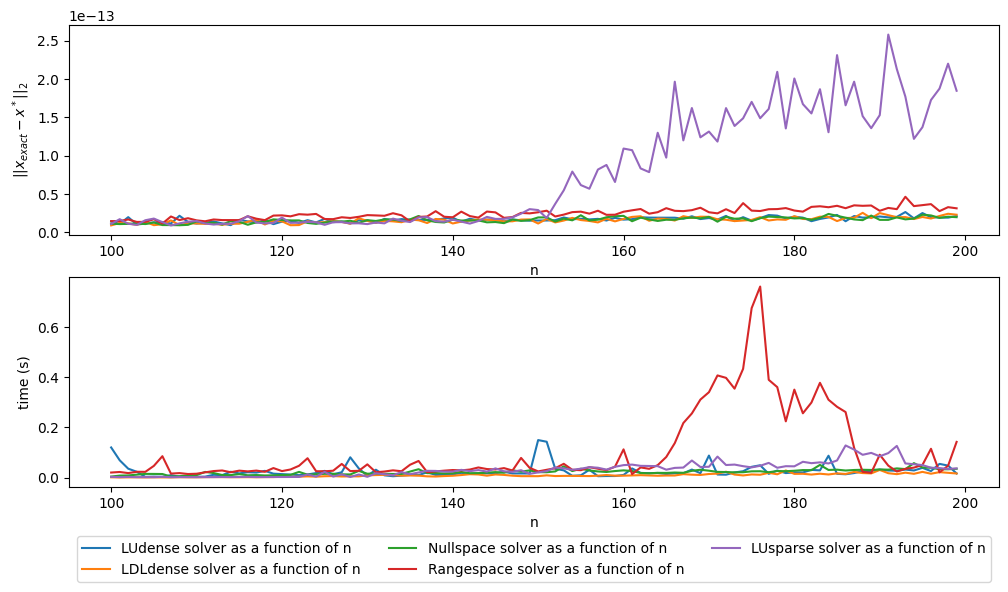

In [20]:
n           = np.arange(start=100,stop=800, dtype=int)
alpha       = 2
solvers     = ["LUdense","LDLdense","Nullspace","Rangespace","LUsparse"]

fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(12, 6)) 
 
for solver in solvers:
    
    err_temp    = []
    times       = []

    # Computing solution from all solvers
    for i in n:

        # Current problem given current n
        H, g, A, b, x_star,lamb_star  = constructQP(i,alpha) 

        # timing the solver
        start = perf_counter()
        x,lam = EqualityQPSolver(H,g,A,b,solver)

        # time of solver
        times.append(perf_counter()-start)
        
        # 2 norm of error
        err_temp.append(np.linalg.norm(x-x_star,2))

    ax1.plot(n,err_temp,label=f"{solver} solver as a function of n")
    ax1.set_xlabel("n")
    ax1.set_ylabel(r"$||x_{exact}-x^*||_2$")

    ax2.plot(n,times,label=f"{solver} solver as a function of n")
    ax2.set_xlabel("number of variables (n)")
    ax2.set_ylabel("time (s)")
    

plt.legend(loc='upper center',ncol=3, bbox_to_anchor=(0.5,-0.2))
plt.show() 


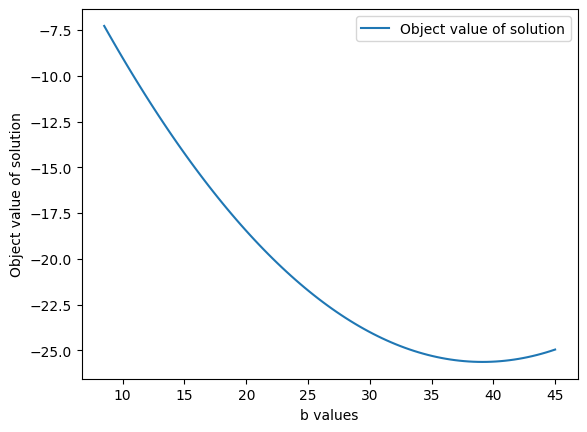

In [7]:
def object_solution(x):

    return 1/2*x.T@H@x+g.T@x

H = np.array([
    [5.0000, 1.8600, 1.2400, 1.4800, -0.4600],
    [1.8600, 3.0000, 0.4400, 1.1200, 0.5200],
    [1.2400, 0.4400, 3.8000, 1.5600, -0.5400],
    [1.4800, 1.1200, 1.5600, 7.2000, -1.1200],
    [-0.4600, 0.5200, -0.5400, -1.1200, 7.8000]
])
A = np.array([
    [16.1000, 1.0000],
    [8.5000, 1.0000],
    [15.7000, 1.0000],
    [10.0200, 1.0000],
    [18.6800, 1.0000]
])
g = np.array([
    -16.1000,
    -8.5000,
    -15.7000,
    -10.0200,
    -18.6800])

def b_vec(val):
    b = np.array([val,1])
    return b

b_values = np.linspace(8.5,45,100)#np.linspace(8.5,18.68,100)

n,m = A.shape
obj_sol = np.zeros(len(b_values))

fig, (ax1) = plt.subplots(1, 1) 
for i,val in enumerate(b_values):
    
    x,lam = EqualityQPSolver(H,g,A,b_vec(val),"LUdense")
    obj_sol[i] = object_solution(x)

ax1.plot(b_values,obj_sol,label = "Object value of solution")
ax1.set_xlabel("b values")
ax1.set_ylabel("Object value of solution")

plt.legend()
plt.show()

In [18]:
x = np.block([[1],[1]])
print(x)
A.T
A.T*x

[[1]
 [1]]


array([[16.1 ,  8.5 , 15.7 , 10.02, 18.68],
       [ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ]])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

"""
Code for contour plots with equality constraints.
"""

def objective(x1, x2,H,g):

    x = np.block(x1,x2)

    return 1/2*x.T@H@x+g.T*x

from scipy.optimize import fsolve

def eq_con(x1):
    def g(x2):
        return x1**2 + x2+1 - 1
    
    # Check if x1 is a scalar (single value)
    if np.isscalar(x1):
        # Handle scalar input
        root = fsolve(g, 0)
        return root[0]
    else:
        # Handle array input
        return np.array([eq_con(element) for element in x1])

x1min, x1max = -5,5
x2min, x2max = -5,5

# Create a grid of points.
x1, x2 = np.meshgrid(np.linspace(x1min, x1max, 400), np.linspace(x2min, x2max, 400))
z = objective(x1, x2)

# implement inequality constraints here
feasible = ((x1+2)**2-x2 >= 0) & (-4*x1+10*x2>= 0)

# Define the infeasible region
infeasible_region = ~feasible

# Initialize the plot.
plt.figure()

# Plot the objective function.
cs = plt.contourf(x1, x2, z, levels=10, cmap='viridis')
plt.contour(cs, colors='k')
plt.colorbar(cs)

# Plot equality constraint
x = np.linspace(x1min,x1max,1000)
plt.plot(x,eq_con(x),"r--")

# Additional settings for the plot.
plt.grid(c='k', ls='-', alpha=0.3)
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim([x1min, x1max])
plt.ylim([x2min, x2max])

# Show the plot.
plt.show()










In [7]:
A=np.array([[1,2,3],[2,3,4]])
print(A.T)
print(A.T[:,0])

[[1 2]
 [2 3]
 [3 4]]
[1 2 3]
